In [1]:
# 必要なライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline

In [2]:
# データが格納されている作業ディレクトリまでパス指定
os.chdir("/Users/naokihamaguchi/Desktop/")

# test.csvの読み取り
test = pd.read_csv("titanictest.csv")

# train.csvの読み取り
train = pd.read_csv("titanictrain.csv")

In [3]:
# 変数の説明
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

SyntaxError: invalid syntax (<ipython-input-3-ac091dd2b50c>, line 2)

In [17]:
# アウトプット対象
'''
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
'''

'''
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.
'''

'\nYour score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.\n'

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# 欠損値処理を行う

In [9]:
# null値が入っている列を抽出
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# null値が入っている列を抽出
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.shape

(891, 12)

In [13]:
test.shape

(418, 11)

In [23]:
# trainのCabin , testのCabinはnull値が大きいので削除

In [34]:
df = train.loc[:, ['Survived','Pclass','Sex','SibSp','Parch','Fare']]

In [35]:
# 5賞からも6賞からも問題を出す。必ず、個体の比熱 電磁場系は必ず出る。 開いた系においては、少なくとも一つは統計分布を導けという問題は出す予定

In [36]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [37]:
df[:11]

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
5,0,3,male,0,0,8.4583
6,0,1,male,0,0,51.8625
7,0,3,male,3,1,21.0750
8,1,3,female,0,2,11.1333
9,1,2,female,1,0,30.0708


In [38]:
# Sexをダミー変数化
sex_mapping = pd.get_dummies(df['Sex'])

In [39]:
# マッピングの実行
df['Sex'] = sex_mapping

In [40]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500


In [79]:
# データを分割
X = df[:, 1:6]
y = df[:, 0].reshape(-1,1)

In [80]:
X.shape

(891, 5)

In [81]:
y.shape

(891, 1)

In [130]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [131]:
# ホールド・アウト法の利用
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [132]:
# 決定木による学習
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [133]:
# 決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [134]:
# 決定曲線をプロット
plot_decision_regions(X, y, tree_1)
plt.xlabel('X')
plt.ylabel('class')
plt.legend(loc='best')
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 2 

In [135]:
# Survived or notそれぞれのデータを取り出して、散布図を表示し、諸々比較してみる

In [136]:
# データを分割していない状態に一旦戻って考える

In [137]:
# X_stdとyを結合

In [138]:
df_X = pd.DataFrame(X_std, columns = ['Pclass','Sex','SibSp','Parch','Fare'])
df_y = pd.DataFrame(y, columns = ['Survived'])
df = pd.concat([df_X, df_y], axis = 1)

In [139]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Survived
0,0.827377,-0.737695,0.432793,-0.473674,-0.502445,0.0
1,-1.566107,1.355574,0.432793,-0.473674,0.786845,1.0
2,0.827377,1.355574,-0.474545,-0.473674,-0.488854,1.0
3,-1.566107,1.355574,0.432793,-0.473674,0.420730,1.0
4,0.827377,-0.737695,-0.474545,-0.473674,-0.486337,0.0


In [140]:
df.corr()

,Pclass,Sex,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.131900,0.083081,0.018443,-0.549500,-0.338481
Sex,-0.131900,1.000000,0.114631,0.245489,0.182333,0.543351
SibSp,0.083081,0.114631,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,0.245489,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.182333,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,0.543351,-0.035322,0.081629,0.257307,1.000000


In [141]:
# SexとPclassのそうかんが高いと思われる

In [142]:
# 説明変数と目的変数を指定
X_2 = df.loc[:, ['Sex', 'Pclass']].values
y_2= df.loc[:, ['Survived']].values
# scikit-learnの仕様に合わせて､一列のベクトルに変換
y_2 = y_2.reshape(-1)

In [143]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 0)

In [144]:
# ロジスティック回帰の学習
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1.0)
lr.fit(X_2_train, y_2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

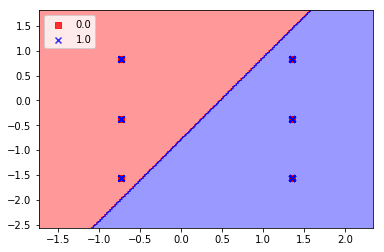

In [147]:
plot_decision_regions(X_2_train, y_2_train, lr)
plt.legend(loc = "upper left")
plt.show()

In [148]:
# 上の結果からはなんとも言えない。

In [150]:
# アウトプットと大きくずれているので方針を立て直す